In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

Importar o arquivo da Primeira Temporada

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))



Saving got-s2-edges (1).csv to got-s2-edges (1).csv
User uploaded file "got-s2-edges (1).csv" with length 8709 bytes


Ler arquivo e criar um Grafo

In [ ]:
fh = open("/content/got-s2-edges.csv")
G = nx.read_weighted_edgelist(fh,delimiter="," ,  create_using=nx.Graph)
fh.close()

# *Métricas de Grafo*


Tamanho do Grafo

In [ ]:
print(f"Quantidade de Nós: {nx.number_of_nodes(G)}")
print(f"Quantidade de Arestas: {nx.number_of_edges(G)}")

Quantidade de Nós: 129
Quantidade de Arestas: 486


Características Principais

In [ ]:
print(f"{'Grafo Direcionado' if nx.is_directed(G) else 'Grafo Não Direcionado'}")

Grafo Não Direcionado


In [ ]:
print(f"{'Grafo Conexo' if nx.is_connected(G) else 'Grafo Desconexo'}")

Grafo Desconexo


In [ ]:
print("Número de Componentes Conexos:", nx.number_connected_components(G))

Número de Componentes Conexos: 2


In [ ]:
print("Densidade: "+"{:.4f}".format(nx.density(G)))

Densidade: 0.0589


In [ ]:
print(f"Grau Médio: {int(sum(g for n, g in G.degree()) / nx.number_of_nodes(G))}")

Grau Médio: 7


In [ ]:
peso = 0

for no1, no2, dados in G.edges(data=True):
    if "weight" in dados:
        peso += dados["weight"]

print("Soma dos pesos das arestas:", peso)


Soma dos pesos das arestas: 6166.0


In [ ]:
from networkx.algorithms.community import louvain_communities

# Executar o algoritmo de Girvan-Newman para encontrar as comunidades

comunidades = louvain_communities(G, seed=None)


for i, c in enumerate(comunidades, 1):
  qtd = len(c)
  print(f"Comunidade {i}: Tamanho: {qtd} personagens \n{c}")
  print('\n')

Comunidade 1: Tamanho: 14 personagens 
{'QUAITHE', 'DROGO', 'RHAEGO', 'SILK_KING', 'JORAH', 'SPICE_KING', 'MALAKKO', 'KOVARRO', 'DAENERYS', 'RAKHARO', 'XARO', 'PYATT_PREE', 'IRRI', 'DOREAH'}


Comunidade 2: Tamanho: 20 personagens 
{'TICKLER', 'KEVAN', 'YOREN', 'RHAENYS', 'AEGON', 'MOUNTAIN', 'BITER', 'HARREN', 'RORGE', 'ARYA', 'LOMMY', 'POLLIVER', 'VISENYA', 'TYWIN', 'JAQEN', 'REGINALD', 'GENDRY', 'AMORY', 'SYRIO_FOREL', 'HOT_PIE'}


Comunidade 3: Tamanho: 13 personagens 
{'FATHER_SEAWORTH', 'CRESSEN', 'MARGAERY', 'MELISANDRE', 'GERARD', 'LITTLEFINGER', 'STANNIS', 'DAVOS', 'LORAS', 'RENLY', 'SALLADHOR', 'MARYA', 'MATTHOS'}


Comunidade 4: Tamanho: 19 personagens 
{'JACKS', 'CATELYN', 'RENNICK', 'COLEN', 'ROBB', 'NED', 'ALTON', 'JON_ARRYN', 'QUENT', 'JAIME', 'TORRHEN', 'ROOSE_BOLTON', 'RICKARD_KARSTARK', 'SEPTON', 'BRIENNE', 'TALISA', 'AERYS', 'FREY_DAUGHTER', 'RAMSAY'}


Comunidade 5: Tamanho: 17 personagens 
{'DAGMER', 'MAESTER_LUWIN', 'THEON', 'HODOR', 'PORTAN', 'OSHA', 'BALON', 'RI

{'JACKS', 'CATELYN', 'RENNICK', 'COLEN', 'ROBB', 'NED', 'ALTON', 'JON_ARRYN', 'QUENT', 'JAIME', 'TORRHEN', 'ROOSE_BOLTON', 'RICKARD_KARSTARK', 'SEPTON', 'BRIENNE', 'TALISA', 'AERYS', 'FREY_DAUGHTER', 'RAMSAY'}


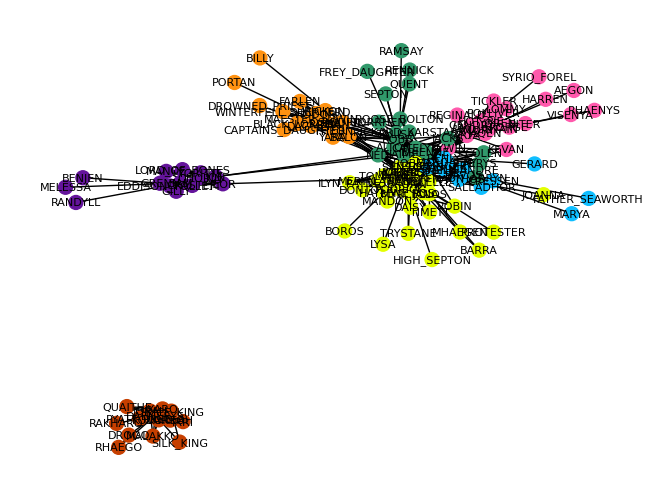

<Figure size 1000x1000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

cores = []
print(comunidades[3])
for node in G.nodes:
  if node in comunidades[0]:
    cores.append('#C63F00') # daenerys
  elif node in comunidades[1]:
    cores.append('#FF59AC') # arya
  elif node in comunidades[2]:
    cores.append('#0FBEFF') # stannis
  elif node in comunidades[3]:
    cores.append('#31996B') # robb e catelyn
  elif node in comunidades[4]:
    cores.append('#FF9211') # theon
  elif node in comunidades[5]:
    cores.append('#64149B') # jon snow
  elif node in comunidades[6]:
    cores.append('#E4FF00') # porto real

graus = dict(G.degree)
tamanhos = [int(graus[no]) * 50 for no in G.nodes]
visibilidade = [ int(graus[no]) > 60 for no in G.nodes]

# nx.draw(G, pos, node_color=cores, cmap=plt.get_cmap('viridis'), with_labels=True)
nx.draw_spring(G, with_labels=True, node_color=cores, font_size = 8, node_size = 100 , width = 1)

# Exiba o gráfico
plt.figure(figsize=(10, 10))
plt.show()


# *Métricas de Vértice*


[['JOFFREY', 36], ['TYRION', 33], ['CERSEI', 31], ['ROBB', 28], ['ARYA', 27], ['TYWIN', 25], ['CATELYN', 23], ['STANNIS', 22], ['THEON', 20], ['LITTLEFINGER', 20], ['NED', 20], ['SANSA', 19], ['JAIME', 18], ['LORAS', 16], ['DAVOS', 15]]


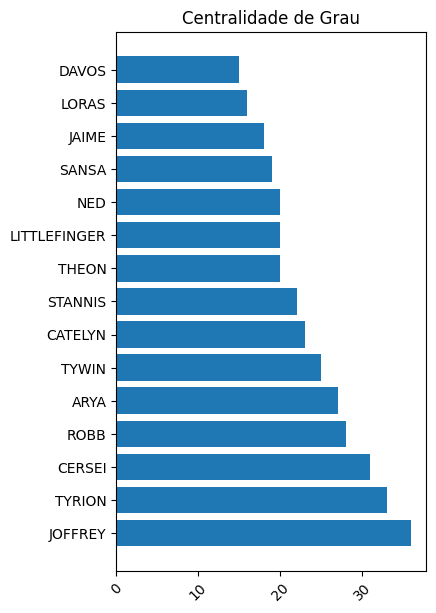

In [ ]:
centralidade_grau = []
for no in G:
  centralidade_grau.append([no, G.degree[no]])

centralidade_grau.sort(key=lambda x: x[1], reverse=True)
centralidade_grau = centralidade_grau[0:15]
print(centralidade_grau)

personagens = [item[0] for item in centralidade_grau]
graus = [item[1] for item in centralidade_grau]

plt.figure(figsize=(4,7))

plt.barh(personagens, graus)
plt.title('Centralidade de Grau')
plt.xticks(rotation=45)
plt.show()

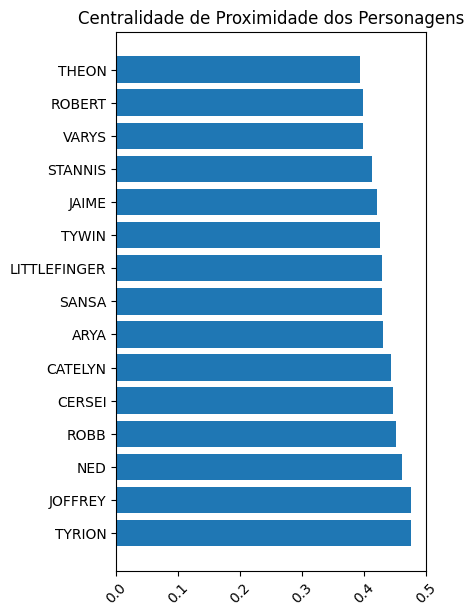

In [ ]:
#prox

lista_proximidade = []
proximidades = nx.closeness_centrality(G)

for no, prox in proximidades.items():
    lista_proximidade.append([no, prox])

lista_proximidade.sort(key=lambda x: x[1], reverse=True)
lista_proximidade = lista_proximidade[0:15]

personagens = [item[0] for item in lista_proximidade]
proximidades = [item[1] for item in lista_proximidade]

plt.figure(figsize=(4,7))
plt.barh(personagens, proximidades)
plt.title('Centralidade de Proximidade dos Personagens')
plt.xticks(rotation=45)
plt.show()

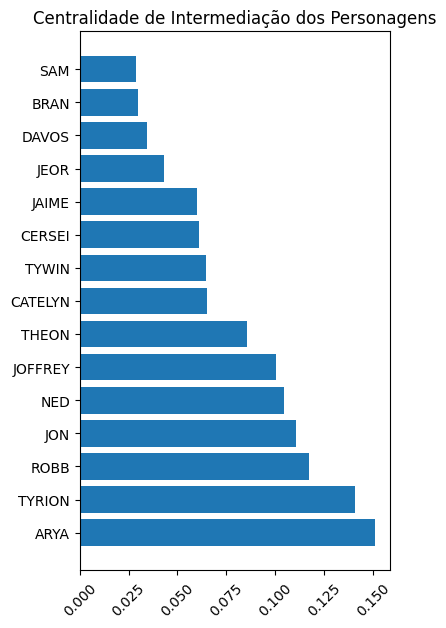

In [ ]:
#intermed

intermediacoes = nx.betweenness_centrality(G)
lista_intermediacoes = []

for no, inter in intermediacoes.items():
    lista_intermediacoes.append([no, inter])

lista_intermediacoes.sort(key=lambda x: x[1], reverse=True)
lista_intermediacoes = lista_intermediacoes[0:15]

personagens = [item[0] for item in lista_intermediacoes]
intermediacoes = [item[1] for item in lista_intermediacoes]

plt.figure(figsize=(4,7))  # Largura x Altura
plt.barh(personagens, intermediacoes)
plt.title('Centralidade de Intermediação dos Personagens')
plt.xticks(rotation=45)
plt.show()

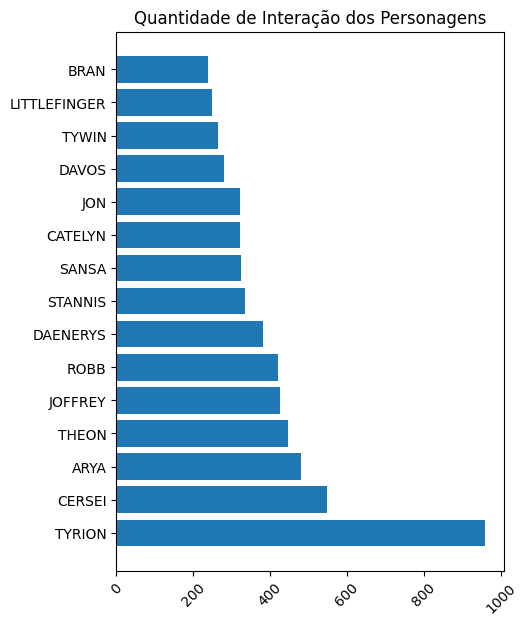

In [ ]:
lista_pesos = []

for no in G.nodes():
  peso = sum([G[no][vizinho]['weight'] for vizinho in G.neighbors(no)])
  lista_pesos.append([no, peso])

lista_pesos.sort(key=lambda x: x[1], reverse=True)
lista_pesos = lista_pesos[0:15]

personagem = [item[0] for item in lista_pesos]
interacoes = [item[1] for item in lista_pesos]

plt.figure(figsize=(5,7))
plt.barh(personagem, interacoes)
plt.title('Quantidade de Interação dos Personagens')
plt.xticks(rotation=45)
plt.show()